In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [32]:
amba = pd.read_csv('./data/AMBA.csv')

In [33]:
print(amba.shape)

(2853, 7)


In [34]:
amba.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-11,6.06,6.44,6.00,6.08,6.08,416700
1,2012-10-12,6.05,6.30,6.01,6.23,6.23,155200
2,2012-10-15,6.35,6.40,6.05,6.15,6.15,156700
3,2012-10-16,6.15,6.30,5.94,6.01,6.01,173000
4,2012-10-17,6.00,6.08,5.99,6.00,6.00,113600


In [35]:
amba.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2.853000e+03
mean,59.399888,60.739012,58.063505,59.403645,59.403645,1.004999e+06
std,33.523402,34.412228,32.559028,33.471636,33.471636,1.204699e+06
min,6.000000,6.080000,5.550000,6.000000,6.000000,1.890000e+04
25%,40.040001,40.990002,39.150002,40.090000,40.090000,4.201000e+05
50%,53.720001,54.740002,52.680000,53.680000,53.680000,6.554000e+05
75%,70.199997,72.059998,68.570000,70.190002,70.190002,1.116200e+06
max,216.660004,227.589996,209.050003,216.839996,216.839996,2.507260e+07


The min open/close price of AMBA is 6.00000
The max open/close price of AMBA is 216.660004 and 216.839996 respectively

In [36]:
amba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2853 non-null   object 
 1   Open       2853 non-null   float64
 2   High       2853 non-null   float64
 3   Low        2853 non-null   float64
 4   Close      2853 non-null   float64
 5   Adj Close  2853 non-null   float64
 6   Volume     2853 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 156.2+ KB


Exploratory Analysis

Determine Mid price pricing trend

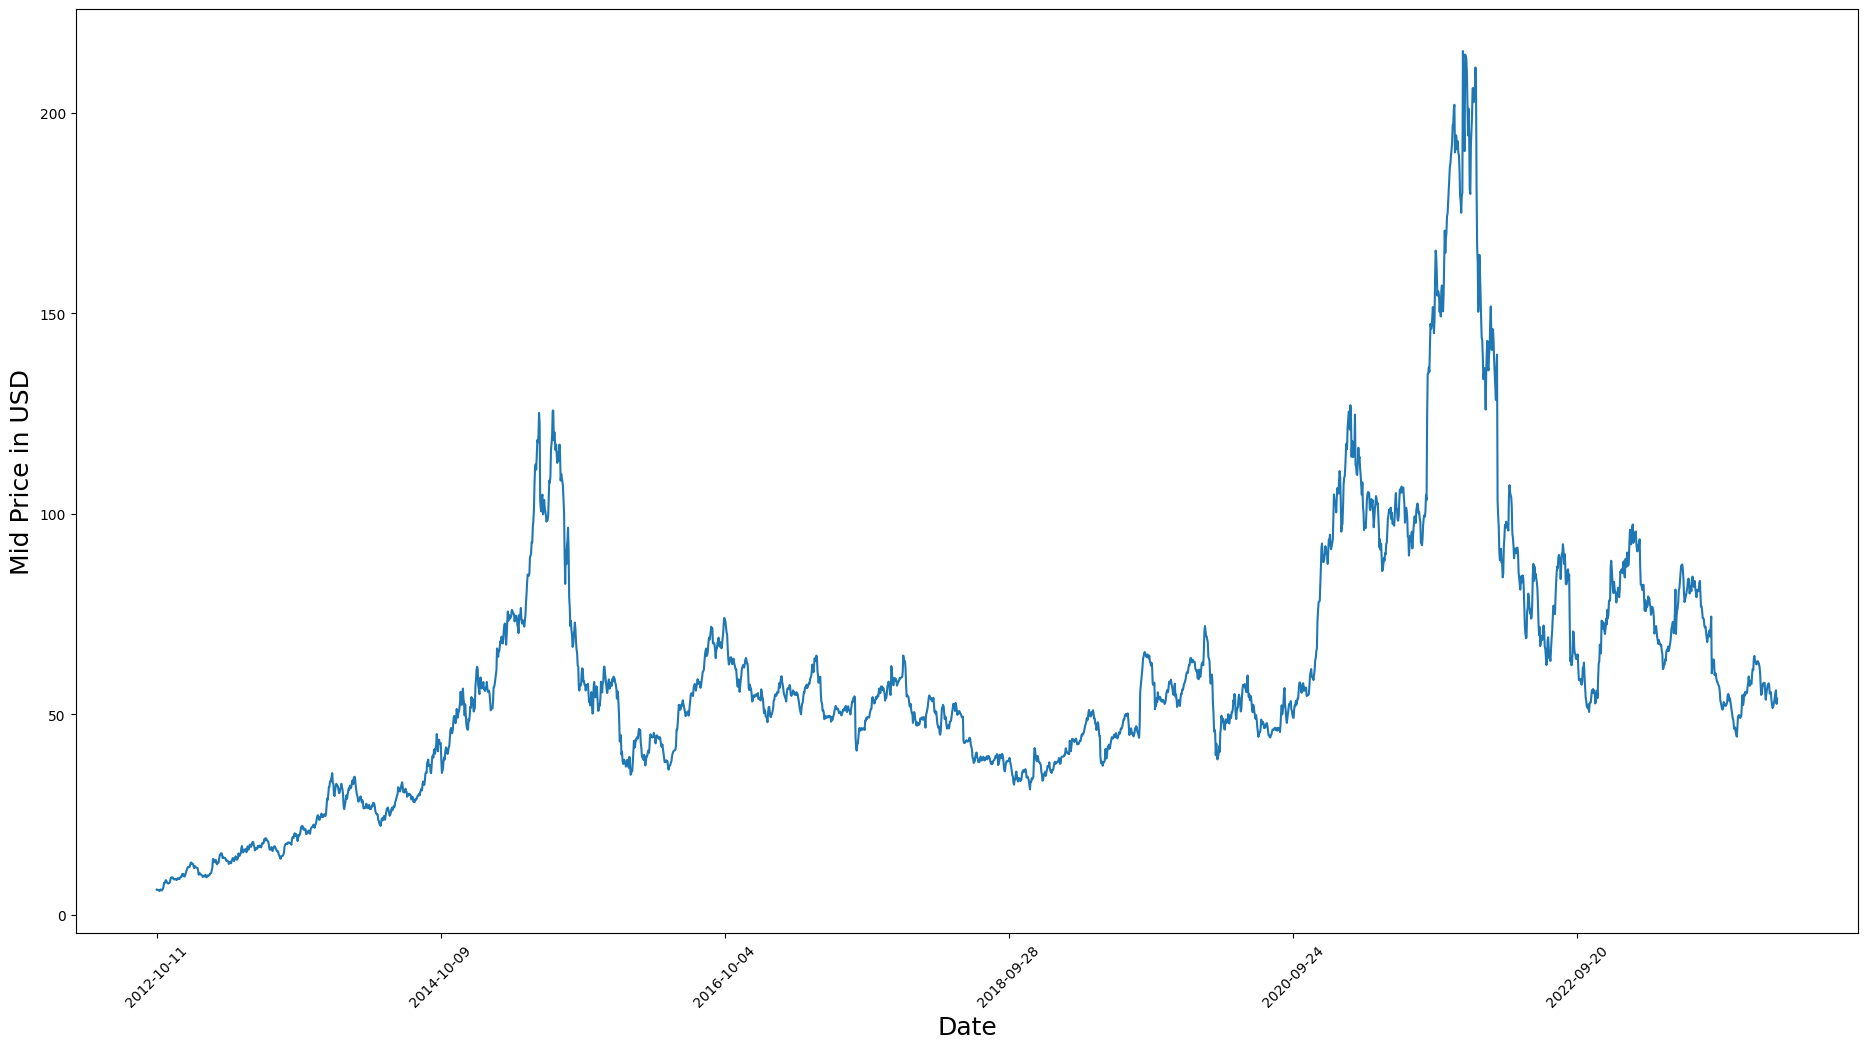

In [37]:
plt.figure(figsize=(23, 12))
plt.plot(range(amba.shape[0]), (amba['Low'] + amba['High']) / 2.0)
plt.xticks(range(0, amba.shape[0], 500), amba['Date'].loc[::500], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price in USD', fontsize=18)
plt.show()


Determine close price trends

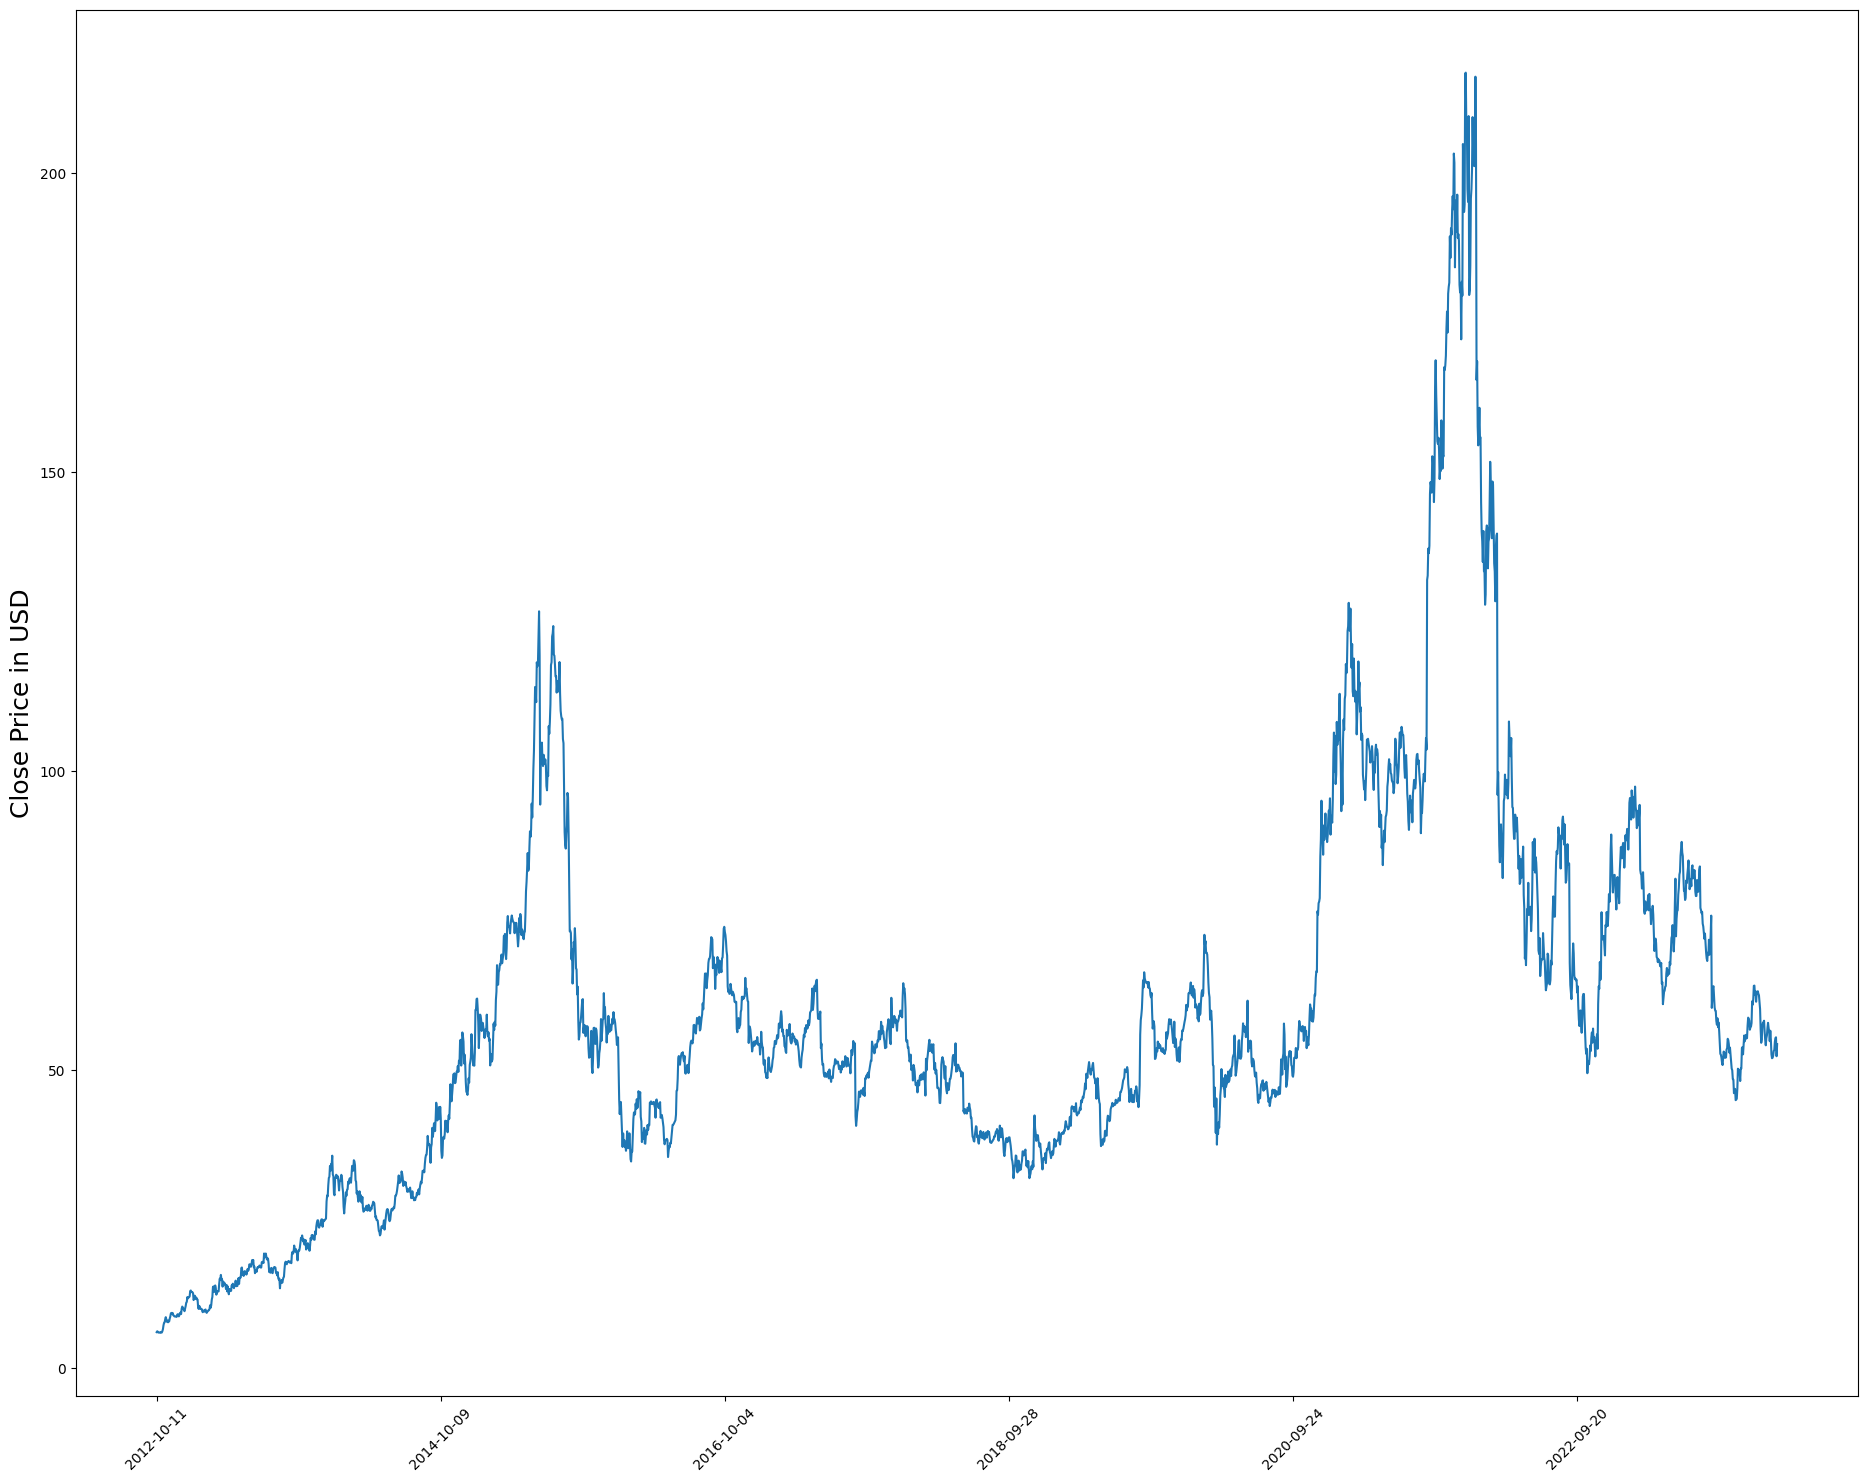

In [38]:
plt.figure(figsize=(23, 18))
plt.plot(amba['Close'])
plt.xticks(range(0, amba.shape[0], 500), amba['Date'].loc[::500], rotation=45)
plt.ylabel('Close Price in USD', fontsize=18)
plt.show()

Confirm null-values

In [39]:
amba.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

/var/folders/gf/xvv1f7qj6_n58v0ybnnd_mtc0000gp/T/ipykernel_3158/1275964749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(amba[col])
/var/folders/gf/xvv1f7qj6_n58v0ybnnd_mtc0000gp/T/ipykernel_3158/1275964749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(amba[col])
/var/folders/gf/xvv1f7

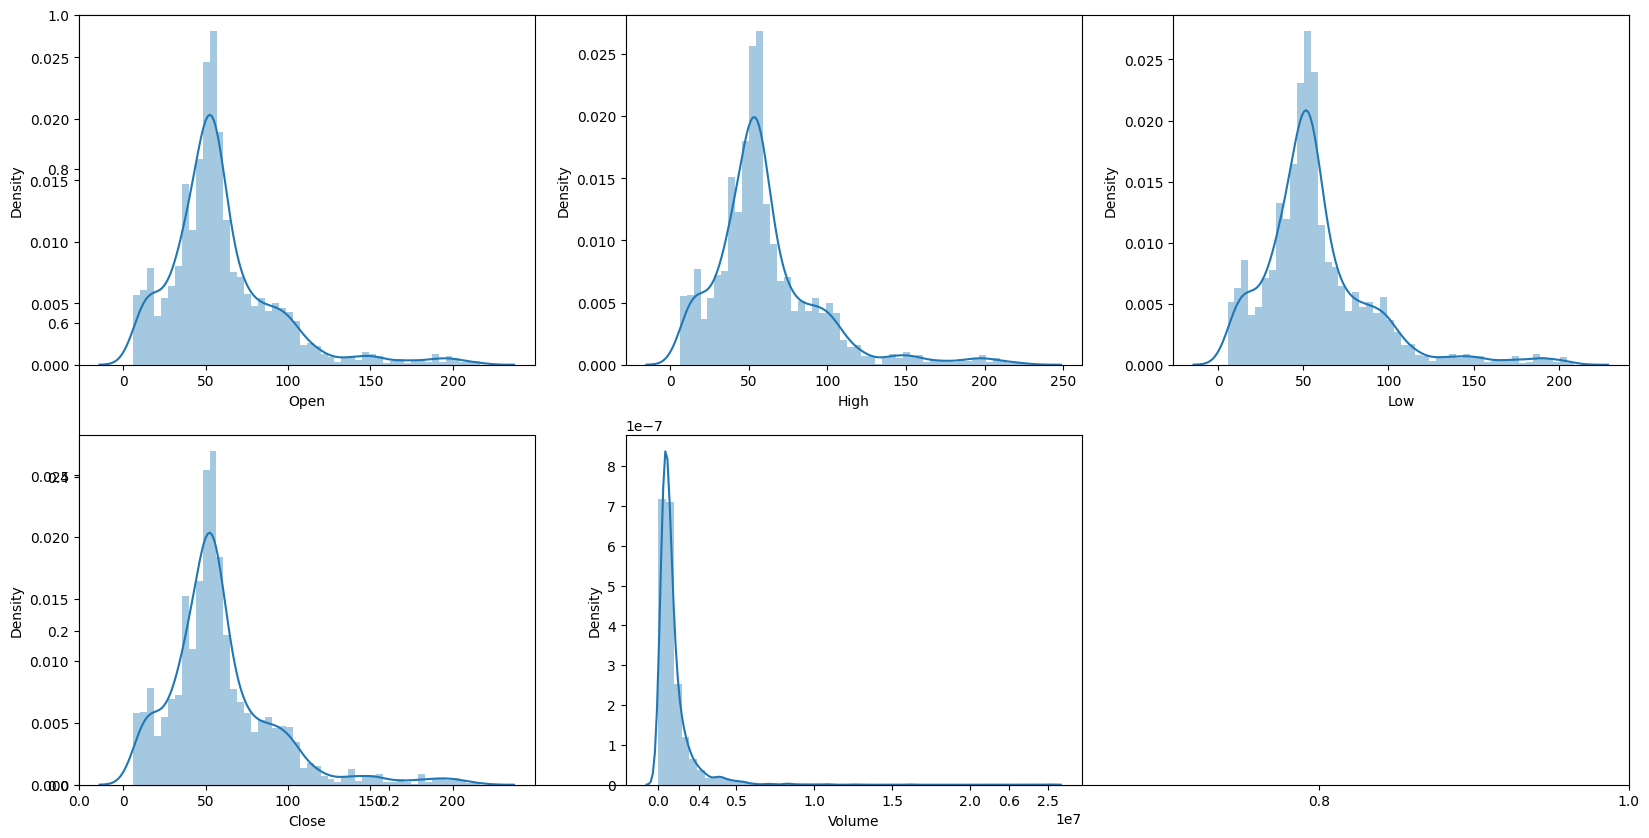

In [40]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(amba[col])
plt.show()


In [41]:
# Split the 'Date' column and handle errors
try:
    splitted = amba['Date'].str.split('-', expand=True)
except Exception as e:
    print("Error occurred during splitting:")
    print(e)

# If splitting was successful, proceed with data processing
if 'splitted' in locals():
    try:
        amba['Year'] = splitted[0].astype('int')
        amba['Month'] = splitted[1].astype('int')
        amba['Day'] = splitted[2].astype('int')
    except Exception as e:
        print("Error occurred during data processing:")
        print(e)

# Display the DataFrame head
print(amba.head())


         Date  Open  High   Low  Close  Adj Close  Volume  Year  Month   Day
0  2012-10-11  6.06  6.44  6.00   6.08       6.08  416700  2012     10  2012
1  2012-10-12  6.05  6.30  6.01   6.23       6.23  155200  2012     10  2012
2  2012-10-15  6.35  6.40  6.05   6.15       6.15  156700  2012     10  2012
3  2012-10-16  6.15  6.30  5.94   6.01       6.01  173000  2012     10  2012
4  2012-10-17  6.00  6.08  5.99   6.00       6.00  113600  2012     10  2012


In [42]:
amba['is_quarter_end'] = np.where(amba['Month']%3==0, 1, 0)
amba.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,is_quarter_end
0,2012-10-11,6.06,6.44,6.00,6.08,6.08,416700,2012,10,2012,0
1,2012-10-12,6.05,6.30,6.01,6.23,6.23,155200,2012,10,2012,0
2,2012-10-15,6.35,6.40,6.05,6.15,6.15,156700,2012,10,2012,0
3,2012-10-16,6.15,6.30,5.94,6.01,6.01,173000,2012,10,2012,0
4,2012-10-17,6.00,6.08,5.99,6.00,6.00,113600,2012,10,2012,0


In [43]:
amba.dtypes

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
Year                int64
Month               int64
Day                 int64
is_quarter_end      int64
dtype: object

In [44]:
# amba['Open'] = pd.to_numeric(amba['Open'], errors='coerce')
# amba['High'] = pd.to_numeric(amba['High'], errors='coerce')
# amba['Low'] = pd.to_numeric(amba['Low'], errors='coerce')
# amba['Close'] = pd.to_numeric(amba['Close'], errors='coerce')


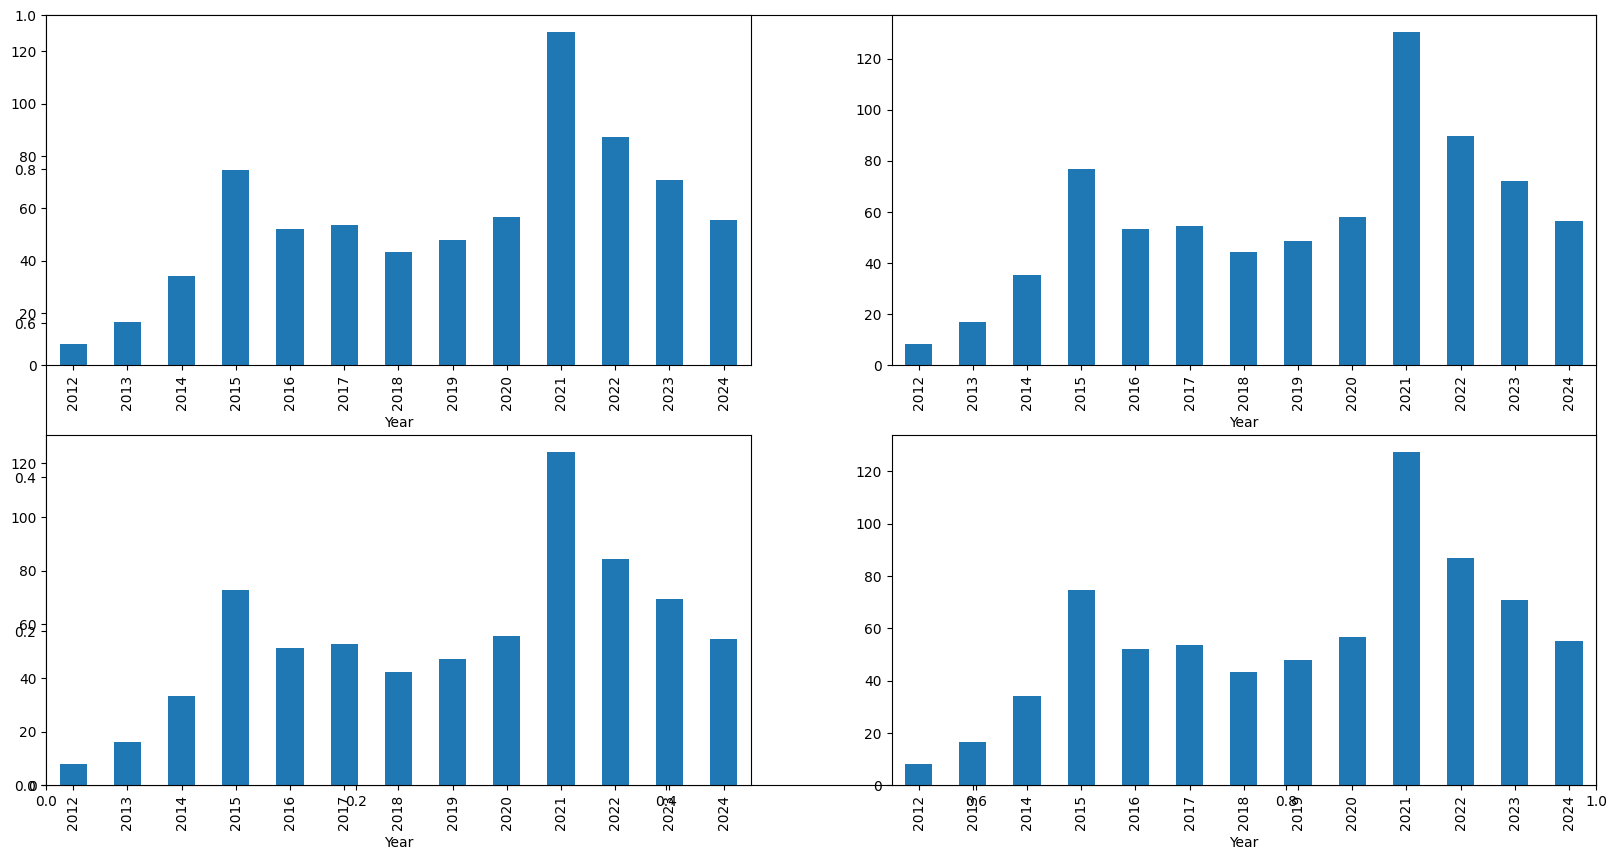

In [51]:
data_grouped = amba.filter(items=["Year", "Open", "High", "Low", "Close"]).groupby("Year").mean()
#data_grouped = amba.groupby('Year').mean()

plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()
